<a href="https://colab.research.google.com/github/seokhee516/Project/blob/main/%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%EC%8B%9C%EB%8F%84%EC%9A%A9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and di

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'legend.fontsize': 15})
plt.rcParams.update({'xtick.labelsize': 22})
plt.rcParams.update({'ytick.labelsize': 22})
plt.rcParams.update({'axes.labelsize': 22})
plt.rcParams.update({'figure.titlesize': 30})
plt.rcParams.update({'axes.titlesize': 30})

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats
#import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv('df.csv', index_col=0)

In [ ]:
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# 북미

In [ ]:
NA_df = df[df['Year']>=2000].iloc[:,:6].sort_values(by='NA_Sales',ascending=False)

In [ ]:
test = NA_df[NA_df['Publisher']=='Microsoft Game Studios']

In [ ]:
test[test['Genre']=='Shooter']

,Name,Platform,Year,Genre,Publisher,NA_Sales
6160,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7970000.0
12337,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.0
9311,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6820000.0
14265,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6630000.0
10099,Halo: Combat Evolved,XB,2001.0,Shooter,Microsoft Game Studios,4980000.0
6425,Halo 3: ODST,X360,2009.0,Shooter,Microsoft Game Studios,4340000.0
7435,Gears of War 2,X360,2008.0,Shooter,Microsoft Game Studios,4150000.0
13714,Gears of War 3,X360,2011.0,Shooter,Microsoft Game Studios,4050000.0
13891,Gears of War,X360,2006.0,Shooter,Microsoft Game Studios,3540000.0
11916,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2640000.0


In [ ]:
NA_df.shape

(10536, 6)

In [ ]:
NA_df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0
4253,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0
16176,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0
6796,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0
10438,Mario Kart DS,DS,2005.0,Racing,Nintendo,9810000.0
6119,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670000.0
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0


북미 판매 0 이상


In [ ]:
NA_df = NA_df[NA_df['NA_Sales']>0]

3DO, DC, WS 제외 없어도 됨

In [ ]:
NA_df = NA_df[NA_df['Platform']!='DC']

In [ ]:
NA_df = NA_df[NA_df['Platform']!='WS']

단종 게임 제외 및 플랫폼별 분류

In [ ]:
NA_df['Platform'].unique() == JP_df['Platform'].unique()

False

In [ ]:
NA_df['Platform'].unique()

array(['Wii', 'X360', 'DS', 'PS2', 'PS3', 'XB', 'GBA', 'PS4', '3DS',
       'XOne', 'GC', 'WiiU', 'PS', 'PSP', 'PC', 'GB', 'N64', 'PSV'],
      dtype=object)

In [ ]:
home['Platform'].unique()

array(['PS', 'N64', 'PS2', 'XB', 'GC', 'PS3', 'X360', 'Wii', 'PS4',
       'XOne', 'WiiU'], dtype=object)

In [ ]:
portable['Platform'].unique()

array(['GB', 'GBA', 'PSP', 'DS', 'PSV', '3DS'], dtype=object)

In [ ]:
pc['Platform'].unique()

array(['PC'], dtype=object)

# 거치형 게임


## 콘솔 세대에 따른 분류 무의미!!

NA_sales
1. 다음 분기 게임 설계 (장르, 플랫폼, 제조사 등등,,,)
2. platform 에 따라 거치형 / 휴대용 콘솔 게임 / PC 게임 으로 대분류
3. 대분류 안에서 5세대~8세대 로 분리 
4. '다음 세대 게임에 이전 세대 게임 판매량이 영향을 줄것인가?' 라는 궁금증(다음 세대 게임 판매량에 5~6세대가 영향이 없다면, 빼고 분석해도 되기 때문) 
5. 4번 물음을 해결하기 위해 어떤 통계 방식을 사용하면 좋을지 생각 -> ANOVA..??
6. ANOVA가 그룹간 평균이 유의미한 차이가 있는지를 알아보는 방식
7. 여기에 표본의 분산을 활용한다는 것은 평균값이 달라도 데이터 분산이 비슷하면 이를 비슷하다고 보는 것인가?? 



In [ ]:
home.groupby('console').describe()['NA_Sales']

,count,mean,std,min,25%,50%,75%,max
console,,,,,,,,
5,292.0,299657.534247,4.353383e+05,10000.0,67500.0,150000.0,320000.0,3050000.0
6,2933.0,299870.439823,5.518832e+05,10000.0,60000.0,120000.0,310000.0,9430000.0
7,3206.0,460661.260137,1.224058e+06,10000.0,90000.0,180000.0,430000.0,41490000.0
8,557.0,390143.626571,6.376026e+05,10000.0,50000.0,160000.0,400000.0,5770000.0


In [ ]:
fvalue, pvalue = stats.f_oneway(home5['NA_Sales'].values,home6['NA_Sales'].values)
print(pvalue)

0.9948965790240073


In [ ]:
fvalue, pvalue = stats.f_oneway(home7['NA_Sales'].values,home8['NA_Sales'].values)
print(pvalue)

0.18406714031977509


In [ ]:
fvalue, pvalue = stats.f_oneway(home5['NA_Sales'].values,home6['NA_Sales'].values,home7['NA_Sales'].values,home8['NA_Sales'].values)
print(pvalue)

1.6811578510994008e-10


In [ ]:
import statsmodels.api as sm

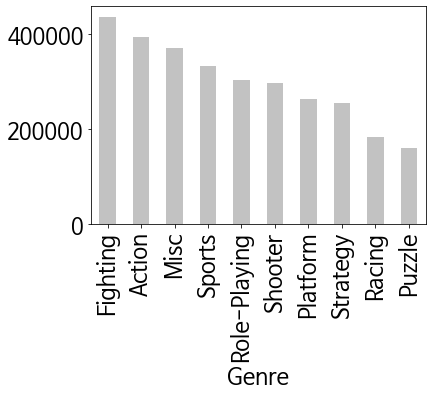

In [ ]:
data = home5.groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
#color[[0,1,3,4]] = '#0070dd'
data.plot(kind='bar',color=color)

# 시작

In [ ]:
home = pd.concat([NA_df[NA_df['Platform']=='PS'],
                   NA_df[NA_df['Platform']=='N64']])

In [ ]:
home6 = pd.concat([NA_df[NA_df['Platform']=='PS2'],
                   NA_df[NA_df['Platform']=='XB'],
                   NA_df[NA_df['Platform']=='GC']])

In [ ]:
home7 = pd.concat([NA_df[NA_df['Platform']=='PS3'],
                   NA_df[NA_df['Platform']=='X360'],
                   NA_df[NA_df['Platform']=='Wii']])

In [ ]:
home8 = pd.concat([NA_df[NA_df['Platform']=='PS4'],
                   NA_df[NA_df['Platform']=='XOne'],
                   NA_df[NA_df['Platform']=='WiiU']])

In [ ]:
home5['console'] = 5
home6['console'] = 6
home7['console'] = 7
home8['console'] = 8

In [ ]:
home = pd.concat([home5,home6,home7,home8])

In [ ]:
homeps = pd.concat([NA_df[NA_df['Platform']=='PS'],
                    NA_df[NA_df['Platform']=='PS2'],
                    NA_df[NA_df['Platform']=='PS3'],
                    NA_df[NA_df['Platform']=='PS4']])

In [ ]:
homexb = pd.concat([NA_df[NA_df['Platform']=='XB'],
                    NA_df[NA_df['Platform']=='X360'],
                    NA_df[NA_df['Platform']=='XOne']])

In [ ]:
homen = pd.concat([NA_df[NA_df['Platform']=='N64'],
                   NA_df[NA_df['Platform']=='GC'],
                   NA_df[NA_df['Platform']=='Wii'],
                   NA_df[NA_df['Platform']=='WiiU']])

In [ ]:
homeps['Console'] = 'PlayStation'
homexb['Console'] = 'XBOX'
homen['Console'] = 'Nintendo'

In [ ]:
home = pd.concat([homeps,homexb,homen])

## 전 세대로 진행

In [ ]:
home.sort_values(by='NA_Sales',ascending=False).iloc[:10,:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,Console
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,Nintendo
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,Nintendo
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,Nintendo
4253,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,XBOX
16176,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,Nintendo
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,Nintendo
6119,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670000.0,XBOX
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0,XBOX
14355,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430000.0,PlayStation
10681,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9090000.0,Nintendo


xbox

In [ ]:
data = home.groupby('Console').mean().sort_values(by='NA_Sales',ascending=False).iloc[:,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 거치형 콘솔');

NameError: ignored

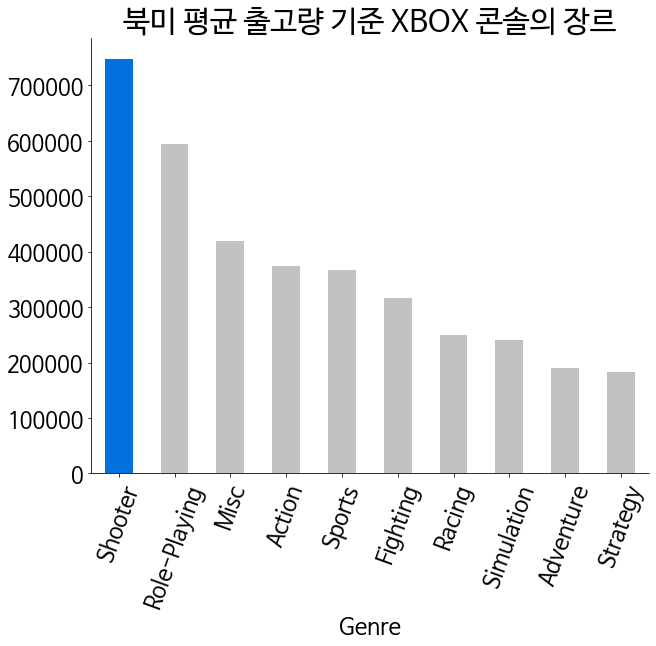

In [ ]:
data = home[home['Console']=='XBOX'].groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 XBOX 콘솔의 장르');

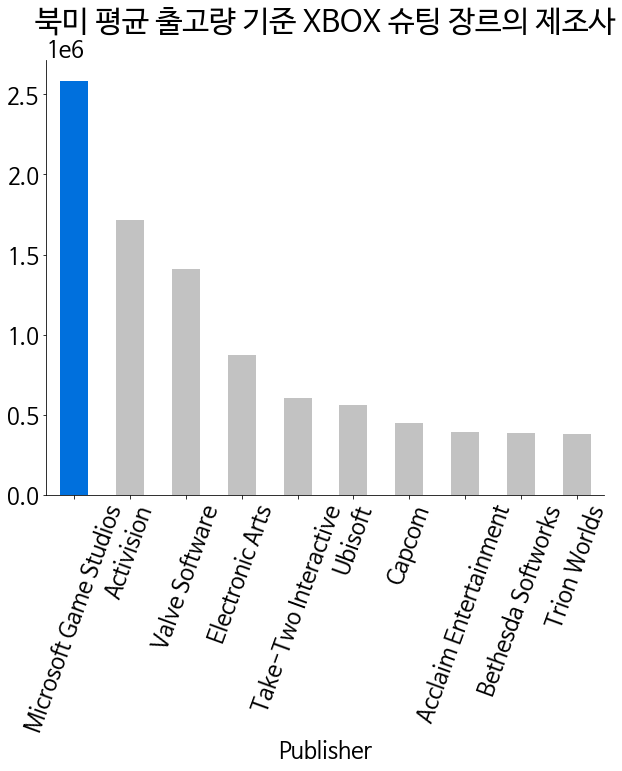

In [ ]:
data = home[(home['Console']=='XBOX')&(home['Genre']=='Shooter')].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 XBOX 슈팅 장르의 제조사', pad=30);

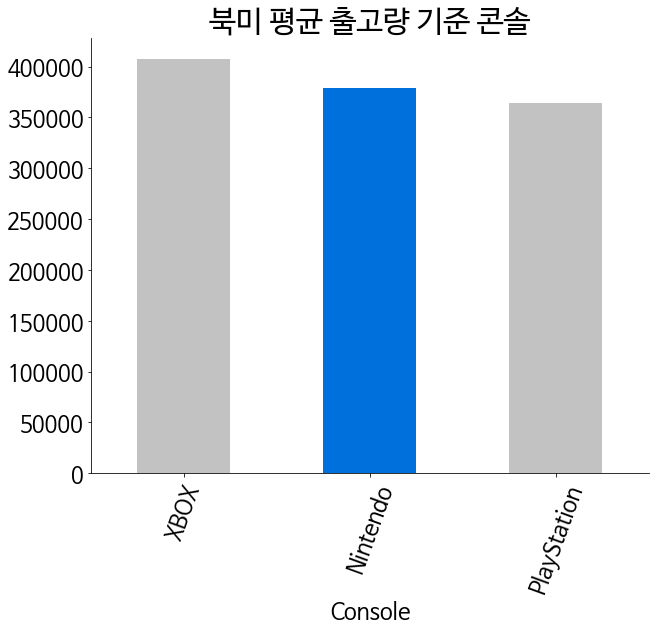

In [ ]:
data = home.groupby('Console').mean().sort_values(by='NA_Sales',ascending=False).iloc[:,1]
color = np.full(len(data), '#c2c2c2')
color[1] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 콘솔');

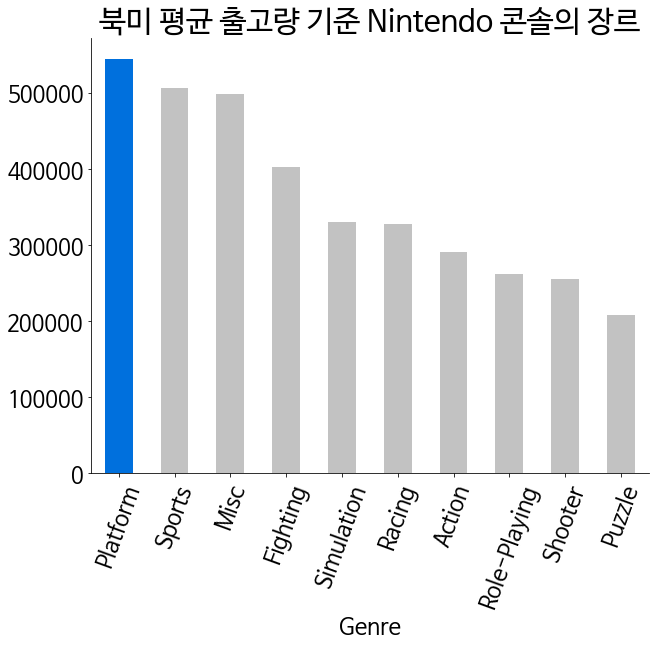

In [ ]:
data = home[home['Console']=='Nintendo'].groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 Nintendo 콘솔의 장르');

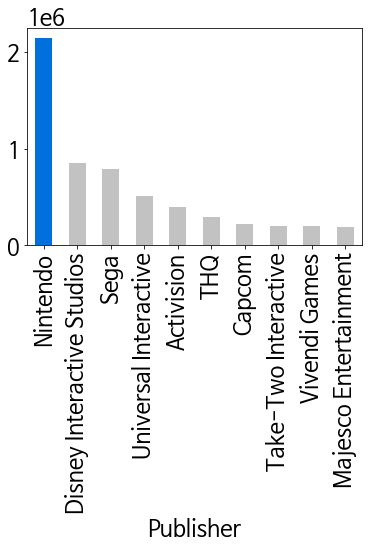

In [ ]:
data = home[(home['Console']=='Nintendo')&(home['Genre']=='Platform')].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

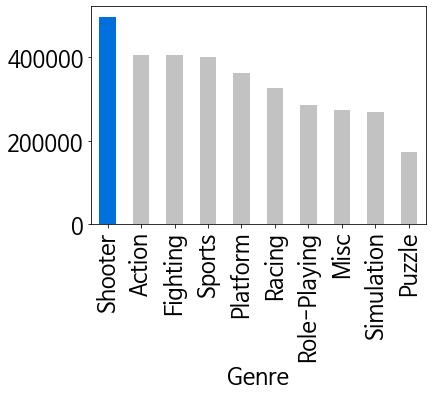

In [ ]:
data = home[home['Console']=='PlayStation'].groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

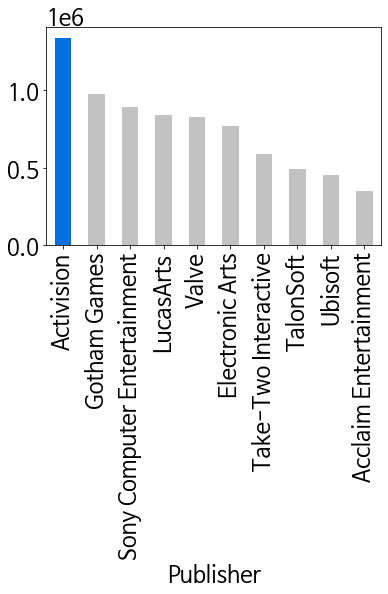

In [ ]:
data = home[(home['Console']=='PlayStation')&(home['Genre']=='Shooter')].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

# 휴대용 게임

In [ ]:
portablen = pd.concat([NA_df[NA_df['Platform']=='GBA'],
                       NA_df[NA_df['Platform']=='DS'],
                       NA_df[NA_df['Platform']=='3DS'],
                       NA_df[NA_df['Platform']=='GB']])
portableps = pd.concat([NA_df[NA_df['Platform']=='PSP'],
                       NA_df[NA_df['Platform']=='PSV']])

In [ ]:
portablen['Console'] = 'Nintendo'
portableps['Console'] = 'PlayStation'

In [ ]:
portable = pd.concat([portablen,portableps])

In [ ]:
portable

,Name,Platform,Year,Genre,Publisher,NA_Sales,Console
10698,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6060000.0,Nintendo
1780,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4340000.0,Nintendo
14115,Super Mario World,GBA,2001.0,Platform,Nintendo,3210000.0,Nintendo
1292,Super Mario Advance,GBA,2001.0,Platform,Nintendo,3140000.0,Nintendo
13666,Namco Museum,GBA,2001.0,Misc,Namco Bandai Games,3000000.0,Nintendo
...,...,...,...,...,...,...,...
6670,Shiren the Wanderer 5 Plus: Fortune Tower and ...,PSV,2015.0,Action,Aksys Games,10000.0,PlayStation
15953,Hatsune Miku: Project Diva X,PSV,2016.0,Misc,Sega,10000.0,PlayStation
3646,Farming Simulator 2014,PSV,2014.0,Simulation,Focus Home Interactive,10000.0,PlayStation
15971,Grand Kingdom,PSV,2015.0,Role-Playing,Nippon Ichi Software,10000.0,PlayStation


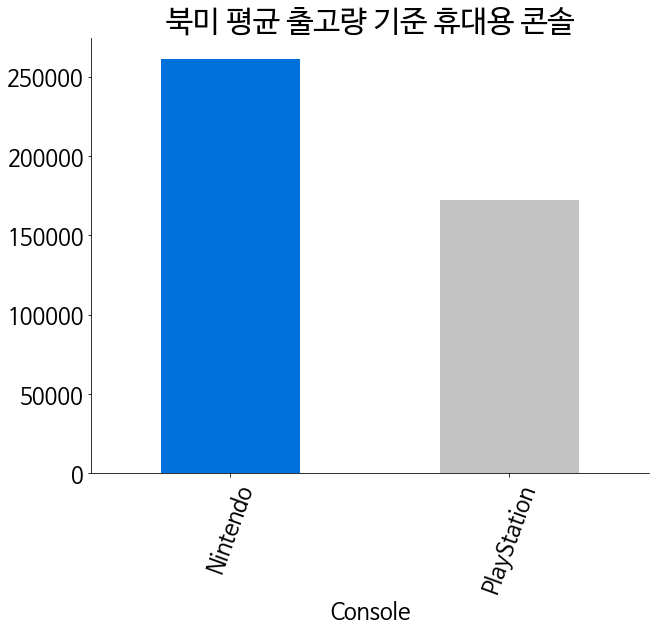

In [ ]:
data = portable.groupby('Console').mean().sort_values(by='NA_Sales',ascending=False).iloc[:,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 휴대용 콘솔');

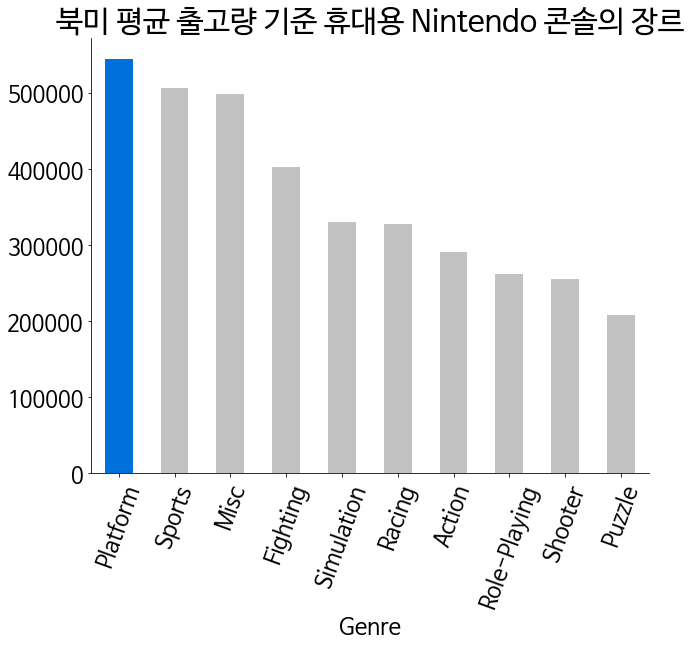

In [ ]:
data = home[home['Console']=='Nintendo'].groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 휴대용 Nintendo 콘솔의 장르');

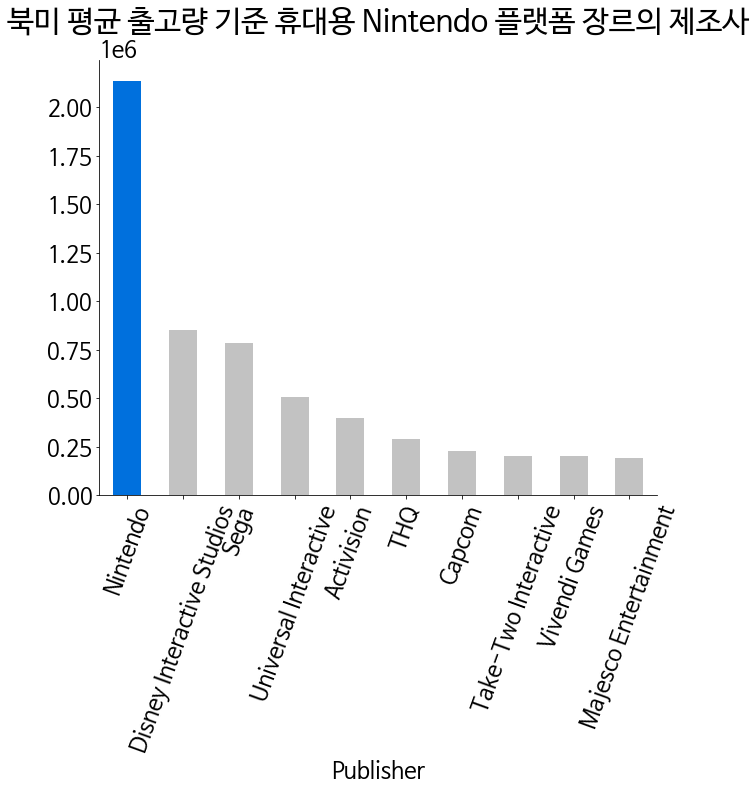

In [ ]:
data = home[(home['Console']=='Nintendo')&(home['Genre']=='Platform')].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 휴대용 Nintendo 플랫폼 장르의 제조사', pad=30);

# PC 게임

In [ ]:
pc = NA_df[NA_df['Platform']=='PC']
pc

,Name,Platform,Year,Genre,Publisher,NA_Sales
8142,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2570000.0
2772,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2560000.0
10224,Diablo III,PC,2012.0,Role-Playing,Activision,2430000.0
6873,Half-Life 2,PC,2004.0,Shooter,Vivendi Games,2280000.0
5278,The Sims: Unleashed,PC,2002.0,Simulation,Electronic Arts,2030000.0
...,...,...,...,...,...,...
1566,Titan Quest,PC,2006.0,Role-Playing,THQ,10000.0
11628,Rocket League,PC,2016.0,Sports,505 Games,10000.0
11290,F.E.A.R. 2: Project Origin,PC,2009.0,Shooter,Warner Bros. Interactive Entertainment,10000.0
11712,Dragon Age Origins: Awakening,PC,2010.0,Role-Playing,Electronic Arts,10000.0


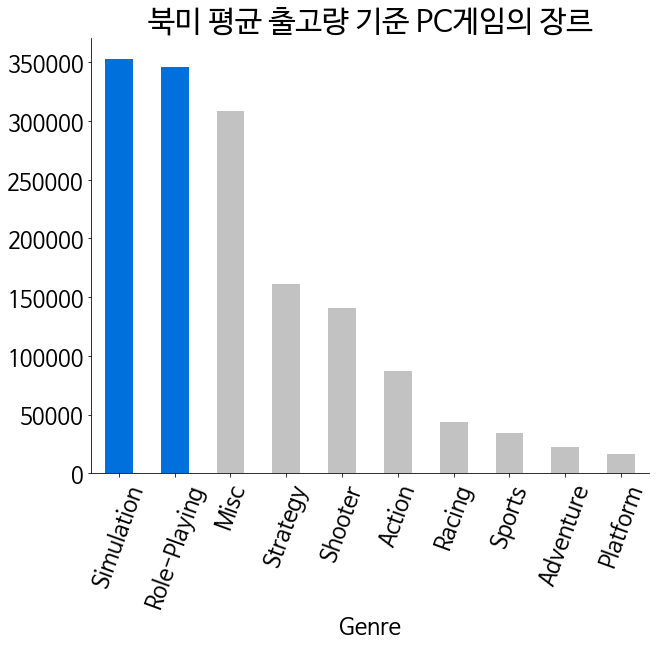

In [ ]:
data = pc.groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[[0,1]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 PC게임의 장르');

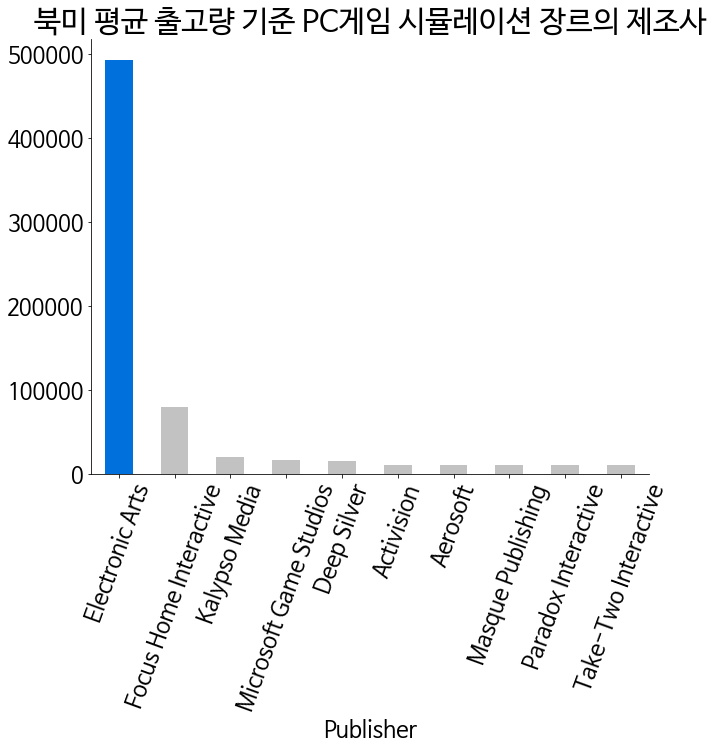

In [ ]:
data = pc[pc['Genre']=='Simulation'].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 PC게임 시뮬레이션 장르의 제조사');

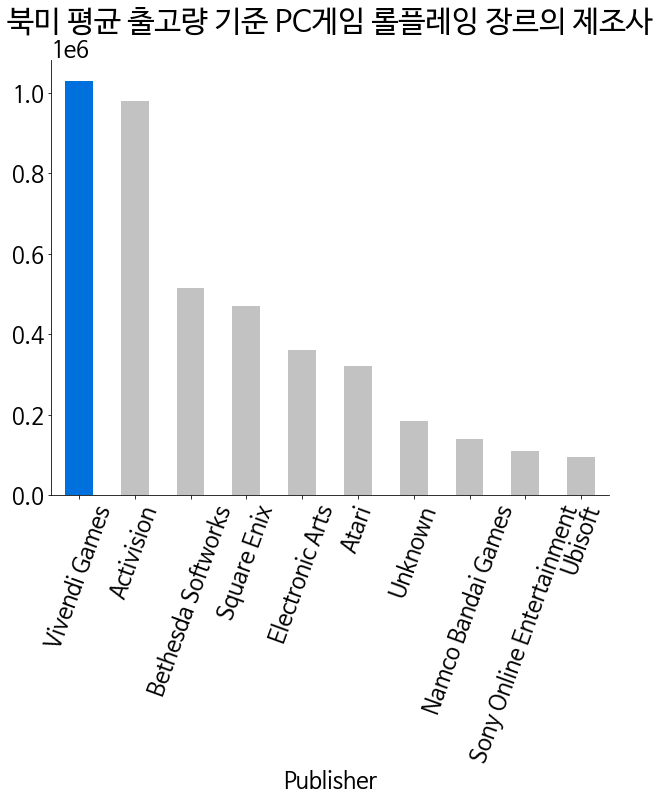

In [ ]:
data = pc[pc['Genre']=='Role-Playing'].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 PC게임 롤플레잉 장르의 제조사', pad = 30);

# 일본

In [ ]:
JP_df = df[df['Year']>=2000].iloc[:,[0,1,2,3,4,7]].sort_values(by='JP_Sales',ascending=False)

In [ ]:
JP_df.shape

(5014, 6)

In [ ]:
JP_df = JP_df[JP_df['JP_Sales']>0]

In [ ]:
JP_df.head(5)

,Name,Platform,Year,Genre,Publisher,JP_Sales
6796,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6500000.0
10345,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6040000.0
10410,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5650000.0
10698,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,5380000.0
3211,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,5330000.0


In [ ]:
JP_df['Platform'].unique()

array(['DS', 'GBA', 'PSP', 'Wii', '3DS', 'PS', 'PS2', 'GB', 'PS3', 'WiiU',
       'GC', 'N64', 'PSV', 'WS', 'PS4', 'DC', 'X360', 'XB', 'PC', 'XOne'],
      dtype=object)

ws, dc

In [ ]:
homeps = pd.concat([JP_df[JP_df['Platform']=='PS'],
                    JP_df[JP_df['Platform']=='PS2'],
                    JP_df[JP_df['Platform']=='PS3'],
                    JP_df[JP_df['Platform']=='PS4']])

In [ ]:
homexb = pd.concat([JP_df[JP_df['Platform']=='XB'],
                    JP_df[JP_df['Platform']=='X360'],
                    JP_df[JP_df['Platform']=='XOne']])

In [ ]:
homen = pd.concat([JP_df[JP_df['Platform']=='N64'],
                   JP_df[JP_df['Platform']=='GC'],
                   JP_df[JP_df['Platform']=='Wii'],
                   JP_df[JP_df['Platform']=='WiiU']])

In [ ]:
homedc = JP_df[JP_df['Platform']=='DC']
homews = JP_df[JP_df['Platform']=='WS']

In [ ]:
homeps['Console'] = 'PlayStation'
homexb['Console'] = 'XBOX'
homen['Console'] = 'Nintendo'
homedc['Console'] = 'Dreamcast'
homews['Console'] = 'WonderSwan'

In [ ]:
home = pd.concat([homeps,homexb,homen,homedc,homews])

## 거치형

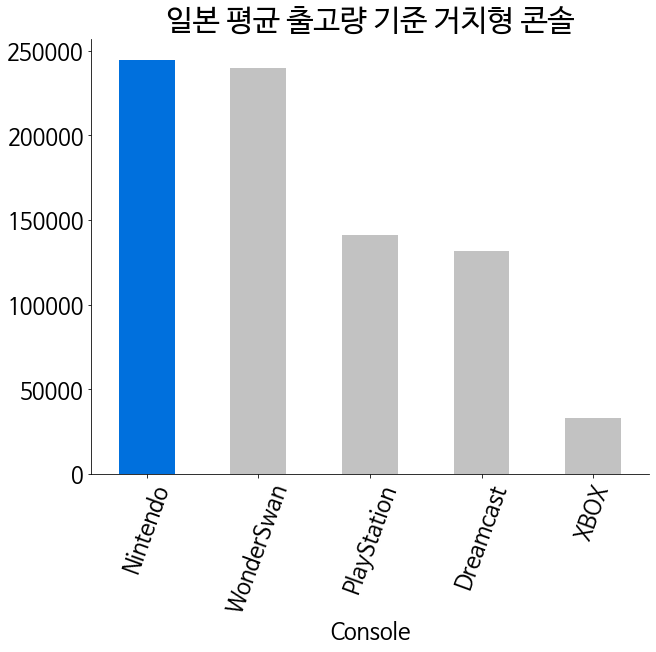

In [ ]:
data = home.groupby('Console').mean().sort_values(by='JP_Sales',ascending=False).iloc[:,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('일본 평균 출고량 기준 거치형 콘솔');

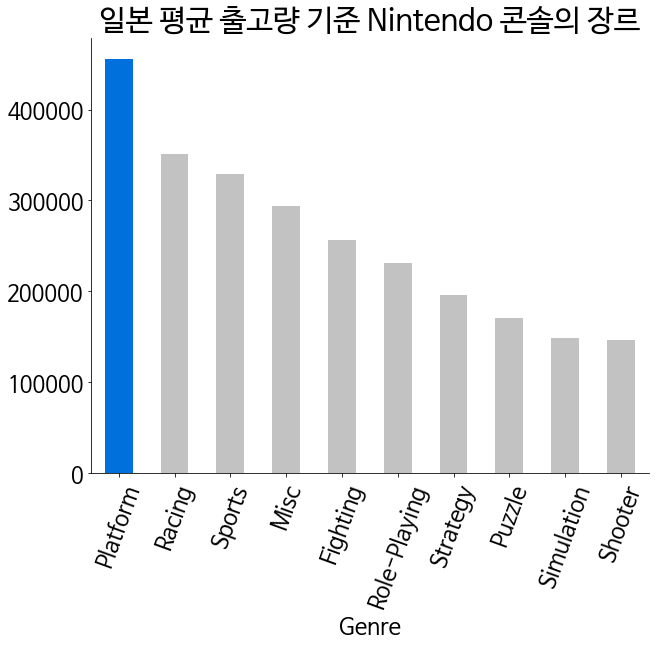

In [ ]:
data = home[home['Console']=='Nintendo'].groupby('Genre').mean().sort_values(by='JP_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('일본 평균 출고량 기준 Nintendo 콘솔의 장르');

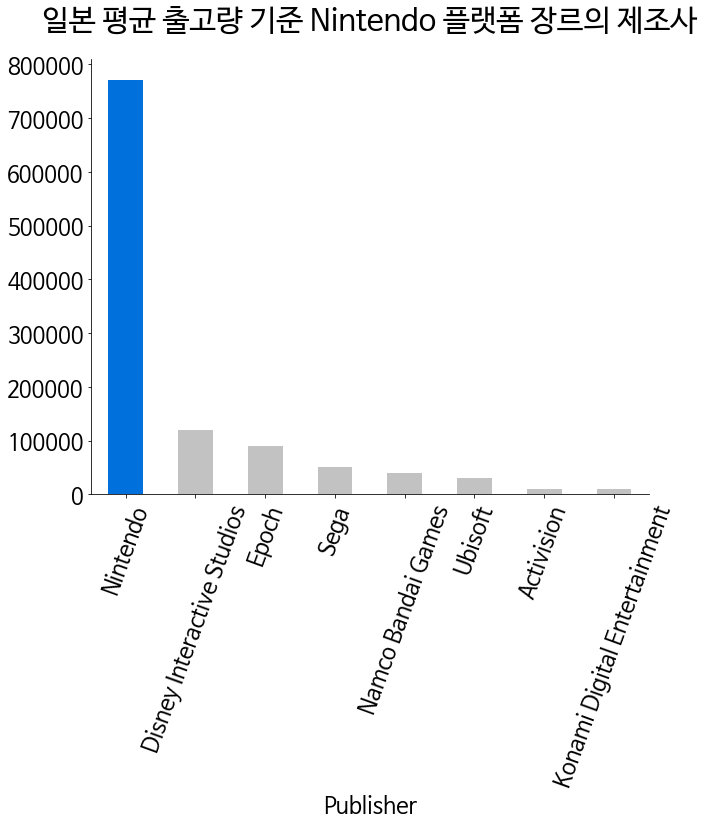

In [ ]:
data = home[(home['Console']=='Nintendo')&(home['Genre']=='Platform')].groupby('Publisher').mean().sort_values(by='JP_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('일본 평균 출고량 기준 Nintendo 플랫폼 장르의 제조사', pad=30);

## 휴대용

In [ ]:
portablen = pd.concat([JP_df[JP_df['Platform']=='GBA'],
                       JP_df[JP_df['Platform']=='DS'],
                       JP_df[JP_df['Platform']=='3DS'],
                       JP_df[JP_df['Platform']=='GB']])
portableps = pd.concat([JP_df[JP_df['Platform']=='PSP'],
                       JP_df[JP_df['Platform']=='PSV']])

In [ ]:
portablen['Console'] = 'Nintendo'
portableps['Console'] = 'PlayStation'

In [ ]:
portable = pd.concat([portablen,portableps])

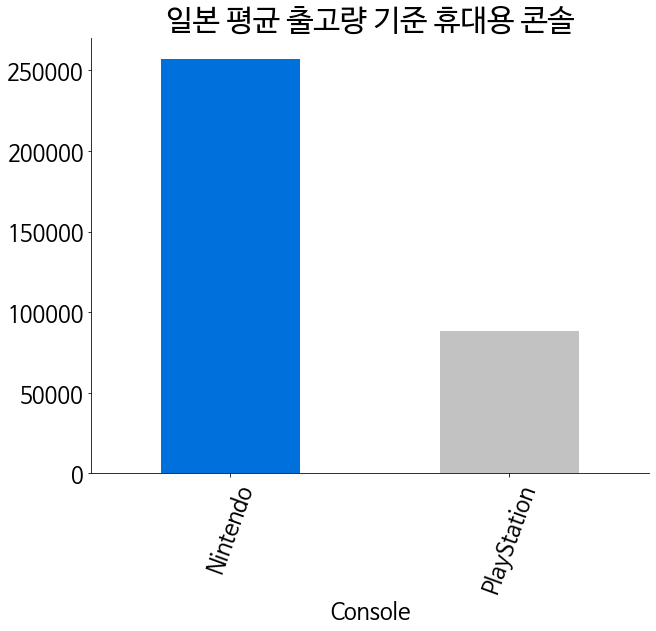

In [ ]:
data = portable.groupby('Console').mean().sort_values(by='JP_Sales',ascending=False).iloc[:,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('일본 평균 출고량 기준 휴대용 콘솔');

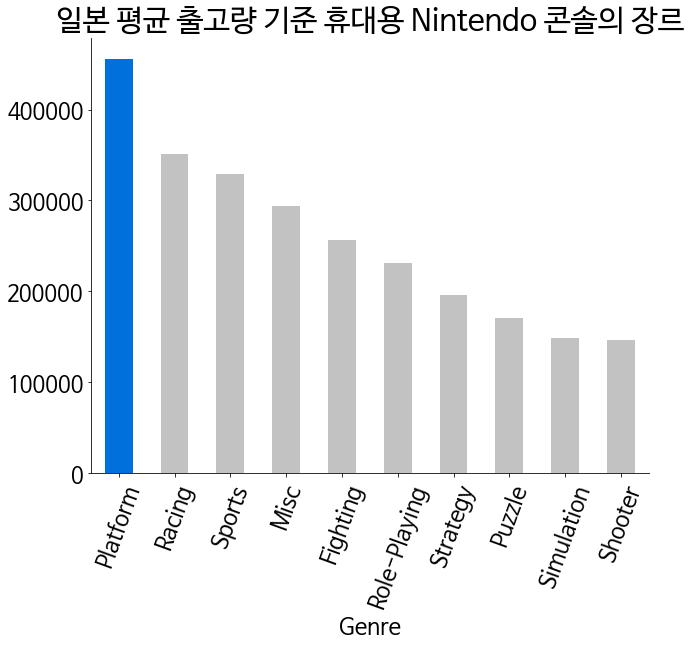

In [ ]:
data = home[home['Console']=='Nintendo'].groupby('Genre').mean().sort_values(by='JP_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('일본 평균 출고량 기준 휴대용 Nintendo 콘솔의 장르');

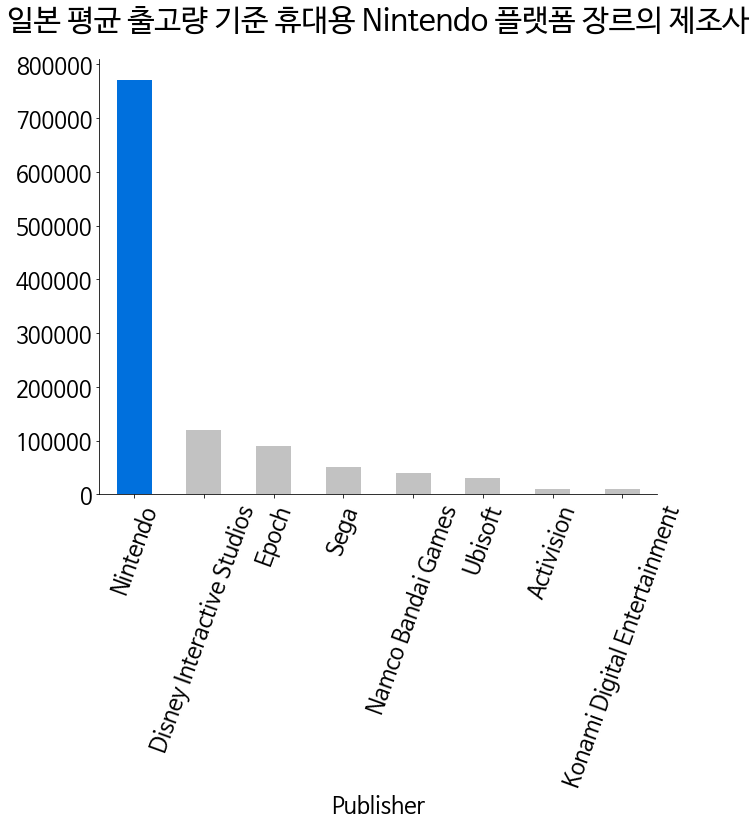

In [ ]:
data = home[(home['Console']=='Nintendo')&(home['Genre']=='Platform')].groupby('Publisher').mean().sort_values(by='JP_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('일본 평균 출고량 기준 휴대용 Nintendo 플랫폼 장르의 제조사', pad=30);

## pc

In [ ]:
df[(df['Platform']=='PC') & (df['JP_Sales']!=0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1106,Half-Life,PC,1997.0,Shooter,Vivendi Games,4030000.0,0.0,90000.0,0.0,4120000.0
6873,Half-Life 2,PC,2004.0,Shooter,Vivendi Games,2280000.0,20000.0,80000.0,0.0,2380000.0


In [ ]:
JP

In [ ]:
pc = JP_df[JP_df['Platform']=='PC']
pc

,Name,Platform,Year,Genre,Publisher,JP_Sales
6873,Half-Life 2,PC,2004.0,Shooter,Vivendi Games,80000.0


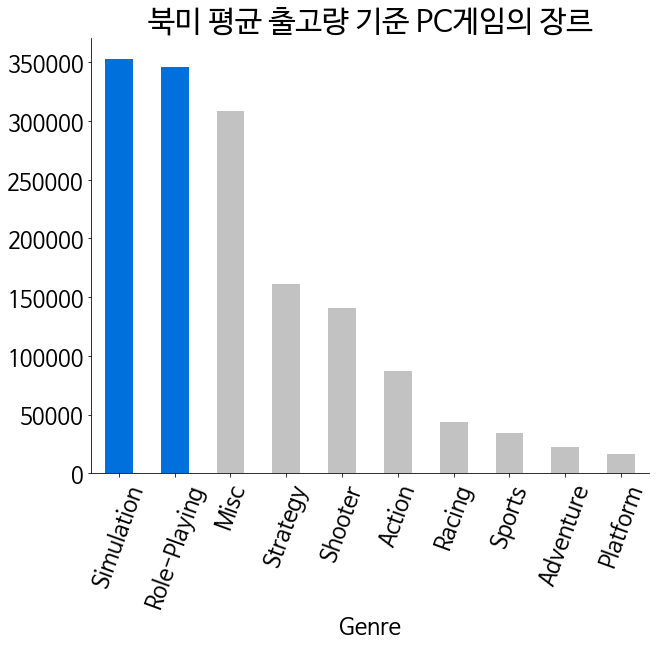

In [ ]:
data = pc.groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[[0,1]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 PC게임의 장르');

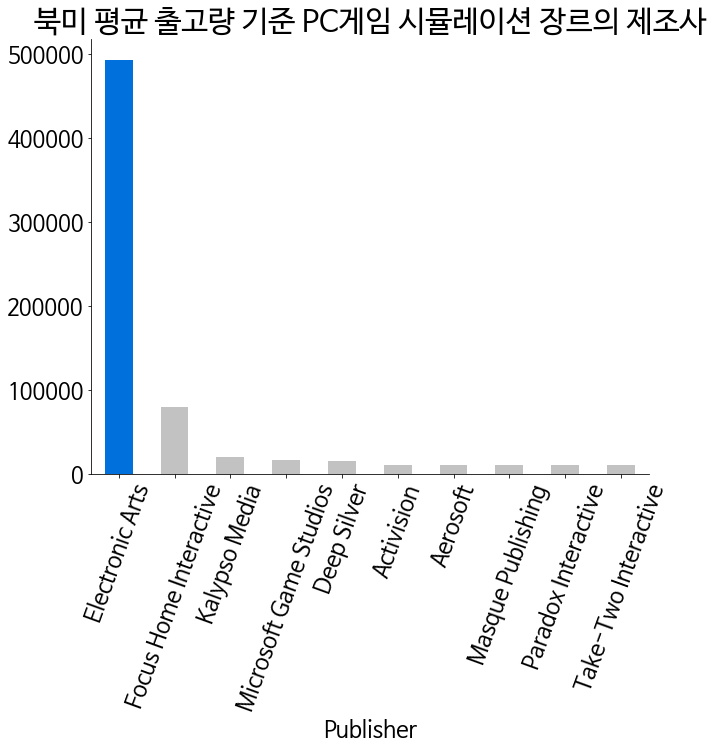

In [ ]:
data = pc[pc['Genre']=='Simulation'].groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 PC게임 시뮬레이션 장르의 제조사');